In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Preprocessing Part starts
# Load the cleaned dataset
url = 'https://drive.google.com/uc?id=1qBkAiPPQ9bTiaY6PcDq7Tmp8DQsCyyrZ'
df = pd.read_csv(url)

# Convert categorical variables to numeric
df_encoded = pd.get_dummies(df)

In [3]:
target_column = 'Churn_No'
# Separate features and target variable
X = df_encoded.drop([target_column, 'Churn_Yes'], axis=1)  # Drop the target variables

# Define the target variable and features
y = df_encoded[target_column]  # Select the target variable

# Split the data into training and testing sets
# 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Convert input data to float32 type for TensorFlow
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [5]:


# Input shape based on the number of features in the dataset
input_shape = X_train.shape[1]

# Define the architecture of the ANN model
model = Sequential()

# Input layer with ReLU activation function
model.add(Dense(units=64, activation='relu', input_shape=(input_shape,)))

# First hidden layer with ReLU and Dropout
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

# Second hidden layer with ReLU and Dropout
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

# Output layer with a single unit and sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model using the Adam optimizer and binary crossentropy for the loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17729 (69.25 KB)
Trainable params: 17729 (

Epoch 1/50
155/155 [==============================] - 3s 6ms/step - loss: 1.0947 - accuracy: 0.6797 - val_loss: 0.5125 - val_accuracy: 0.7283
Epoch 2/50
155/155 [==============================] - 1s 3ms/step - loss: 0.5334 - accuracy: 0.7418 - val_loss: 0.4935 - val_accuracy: 0.7392
Epoch 3/50
155/155 [==============================] - 1s 3ms/step - loss: 0.5076 - accuracy: 0.7519 - val_loss: 0.4713 - val_accuracy: 0.7804
Epoch 4/50
155/155 [==============================] - 1s 3ms/step - loss: 0.4915 - accuracy: 0.7708 - val_loss: 0.4766 - val_accuracy: 0.7728
Epoch 5/50
155/155 [==============================] - 1s 3ms/step - loss: 0.4954 - accuracy: 0.7671 - val_loss: 0.4610 - val_accuracy: 0.7866
Epoch 6/50
155/155 [==============================] - 1s 3ms/step - loss: 0.4755 - accuracy: 0.7738 - val_loss: 0.4419 - val_accuracy: 0.7913
Epoch 7/50
155/155 [==============================] - 1s 4ms/step - loss: 0.4668 - accuracy: 0.7807 - val_loss: 0.4369 - val_accuracy: 0.7885
Epoch 

c:\Users\jaint\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


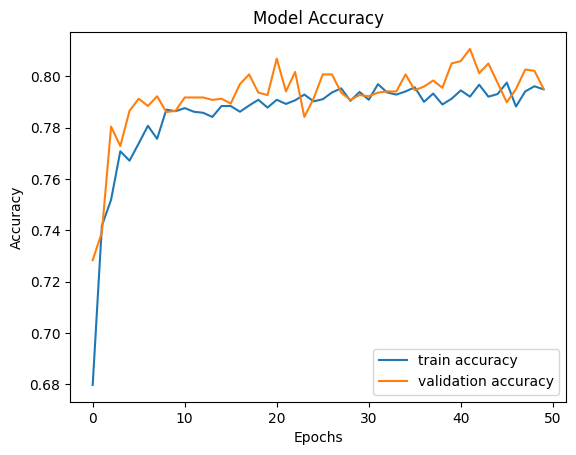

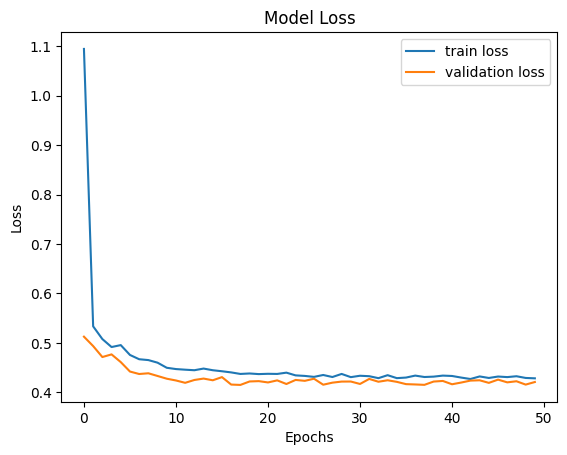

In [6]:
# Train the ANN model on the training set
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the trained model for future use
model.save('trained_ann_model.h5')

In [ ]:
# Plot training history (accuracy and loss over epochs)

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
